In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

temperatures=pd.read_csv("temperatures.csv",sep=",")
temperatures

,Unnamed: 0,date,city,country,avg_temp_c
0,0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,4,2000-05-01,Abidjan,Côte D'Ivoire,27.547
...,...,...,...,...,...
16495,16495,2013-05-01,Xian,China,18.979
16496,16496,2013-06-01,Xian,China,23.522
16497,16497,2013-07-01,Xian,China,25.251
16498,16498,2013-08-01,Xian,China,24.528


# 3. Slicing and Indexing

## a) Setting and removing indexes

In [2]:
# Index temperatures by city
temperatures_ind = temperatures.set_index("city")

# Look at temperatures_ind
print(temperatures_ind)

         Unnamed: 0        date        country  avg_temp_c
city                                                      
Abidjan           0  2000-01-01  Côte D'Ivoire      27.293
Abidjan           1  2000-02-01  Côte D'Ivoire      27.685
Abidjan           2  2000-03-01  Côte D'Ivoire      29.061
Abidjan           3  2000-04-01  Côte D'Ivoire      28.162
Abidjan           4  2000-05-01  Côte D'Ivoire      27.547
...             ...         ...            ...         ...
Xian          16495  2013-05-01          China      18.979
Xian          16496  2013-06-01          China      23.522
Xian          16497  2013-07-01          China      25.251
Xian          16498  2013-08-01          China      24.528
Xian          16499  2013-09-01          China         NaN

[16500 rows x 4 columns]


In [3]:
# Reset the index, keeping its contents
print(temperatures_ind.reset_index())

          city  Unnamed: 0        date        country  avg_temp_c
0      Abidjan           0  2000-01-01  Côte D'Ivoire      27.293
1      Abidjan           1  2000-02-01  Côte D'Ivoire      27.685
2      Abidjan           2  2000-03-01  Côte D'Ivoire      29.061
3      Abidjan           3  2000-04-01  Côte D'Ivoire      28.162
4      Abidjan           4  2000-05-01  Côte D'Ivoire      27.547
...        ...         ...         ...            ...         ...
16495     Xian       16495  2013-05-01          China      18.979
16496     Xian       16496  2013-06-01          China      23.522
16497     Xian       16497  2013-07-01          China      25.251
16498     Xian       16498  2013-08-01          China      24.528
16499     Xian       16499  2013-09-01          China         NaN

[16500 rows x 5 columns]


In [4]:
# Reset the index, dropping its contents
print(temperatures_ind.reset_index(drop = True))

       Unnamed: 0        date        country  avg_temp_c
0               0  2000-01-01  Côte D'Ivoire      27.293
1               1  2000-02-01  Côte D'Ivoire      27.685
2               2  2000-03-01  Côte D'Ivoire      29.061
3               3  2000-04-01  Côte D'Ivoire      28.162
4               4  2000-05-01  Côte D'Ivoire      27.547
...           ...         ...            ...         ...
16495       16495  2013-05-01          China      18.979
16496       16496  2013-06-01          China      23.522
16497       16497  2013-07-01          China      25.251
16498       16498  2013-08-01          China      24.528
16499       16499  2013-09-01          China         NaN

[16500 rows x 4 columns]


## b) Subsetting with .loc[]

The killer feature for indexes is .loc[]: a subsetting method that accepts index values. When you pass it a single argument, it will take a subset of rows.

The code for subsetting using .loc[] can be easier to read than standard square bracket subsetting, which can make your code less burdensome to maintain.

In [5]:
# Make a list of cities to subset on
cities = ["Moscow", "Saint Petersburg"]

# Subset temperatures using square brackets. Use [] subsetting to filter temperatures for rows where the city column takes a value in the cities list.
print(temperatures[temperatures["city"].isin(cities)])

# Subset temperatures_ind using .loc[]. Use .loc[] subsetting to filter temperatures_ind for rows where the city is in the cities list.
print(temperatures_ind.loc[cities])

       Unnamed: 0        date              city country  avg_temp_c
10725       10725  2000-01-01            Moscow  Russia      -7.313
10726       10726  2000-02-01            Moscow  Russia      -3.551
10727       10727  2000-03-01            Moscow  Russia      -1.661
10728       10728  2000-04-01            Moscow  Russia      10.096
10729       10729  2000-05-01            Moscow  Russia      10.357
...           ...         ...               ...     ...         ...
13360       13360  2013-05-01  Saint Petersburg  Russia      12.355
13361       13361  2013-06-01  Saint Petersburg  Russia      17.185
13362       13362  2013-07-01  Saint Petersburg  Russia      17.234
13363       13363  2013-08-01  Saint Petersburg  Russia      17.153
13364       13364  2013-09-01  Saint Petersburg  Russia         NaN

[330 rows x 5 columns]
                  Unnamed: 0        date country  avg_temp_c
city                                                        
Moscow                 10725  2000-01-

## c) Setting multi-level indexes

Indexes can also be made out of multiple columns, forming a multi-level index (sometimes called a hierarchical index). There is a trade-off to using these.

The benefit is that multi-level indexes make it more natural to reason about nested categorical variables. For example, in a clinical trial, you might have control and treatment groups. Then each test subject belongs to one or another group, and we can say that a test subject is nested inside the treatment group. Similarly, in the temperature dataset, the city is located in the country, so we can say a city is nested inside the country.

The main downside is that the code for manipulating indexes is different from the code for manipulating columns, so you have to learn two syntaxes and keep track of how your data is represented.

In [6]:
# Index temperatures by country & city
temperatures_ind = temperatures.set_index(["country", "city"])

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [("Brazil", "Rio De Janeiro"), ("Pakistan", "Lahore")]

# Subset for rows to keep
print(temperatures_ind.loc[rows_to_keep])

                         Unnamed: 0        date  avg_temp_c
country  city                                              
Brazil   Rio De Janeiro       12540  2000-01-01      25.974
         Rio De Janeiro       12541  2000-02-01      26.699
         Rio De Janeiro       12542  2000-03-01      26.270
         Rio De Janeiro       12543  2000-04-01      25.750
         Rio De Janeiro       12544  2000-05-01      24.356
...                             ...         ...         ...
Pakistan Lahore                8575  2013-05-01      33.457
         Lahore                8576  2013-06-01      34.456
         Lahore                8577  2013-07-01      33.279
         Lahore                8578  2013-08-01      31.511
         Lahore                8579  2013-09-01         NaN

[330 rows x 3 columns]


## d) Sorting by index values
Previously, you changed the order of the rows in a DataFrame by calling .sort_values(). It's also useful to be able to sort by elements in the index. For this, you need to use .sort_index().

In [7]:
# Sort temperatures_ind by index values
print(temperatures_ind.sort_index())

# Sort temperatures_ind by index values at the city level
print(temperatures_ind.sort_index(level=["city"]))

# Sort temperatures_ind by country then descending city
print(temperatures_ind.sort_index(level=["country", "city"], ascending=[True, False]))

                    Unnamed: 0        date  avg_temp_c
country     city                                      
Afghanistan Kabul         7260  2000-01-01       3.326
            Kabul         7261  2000-02-01       3.454
            Kabul         7262  2000-03-01       9.612
            Kabul         7263  2000-04-01      17.925
            Kabul         7264  2000-05-01      24.658
...                        ...         ...         ...
Zimbabwe    Harare        5605  2013-05-01      18.298
            Harare        5606  2013-06-01      17.020
            Harare        5607  2013-07-01      16.299
            Harare        5608  2013-08-01      19.232
            Harare        5609  2013-09-01         NaN

[16500 rows x 3 columns]
                       Unnamed: 0        date  avg_temp_c
country       city                                       
Côte D'Ivoire Abidjan           0  2000-01-01      27.293
              Abidjan           1  2000-02-01      27.685
              Abidjan      

## e) Slicing index values

Slicing lets you select consecutive elements of an object using first:last syntax. DataFrames can be sliced by index values or by row/column number; we'll start with the first case. This involves slicing inside the .loc[] method.

Compared to slicing lists, there are a few things to remember.

- You can only slice an index if the index is sorted (using .sort_index()).
- To slice at the outer level, first and last can be strings.
- To slice at inner levels, first and last should be tuples.
- If you pass a single slice to .loc[], it will slice the rows.

In [8]:
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

# Subset rows from Pakistan to Russia
print(temperatures_srt.loc["Pakistan":"Russia"])

                           Unnamed: 0        date  avg_temp_c
country  city                                                
Pakistan Faisalabad              4785  2000-01-01      12.792
         Faisalabad              4786  2000-02-01      14.339
         Faisalabad              4787  2000-03-01      20.309
         Faisalabad              4788  2000-04-01      29.072
         Faisalabad              4789  2000-05-01      34.845
...                               ...         ...         ...
Russia   Saint Petersburg       13360  2013-05-01      12.355
         Saint Petersburg       13361  2013-06-01      17.185
         Saint Petersburg       13362  2013-07-01      17.234
         Saint Petersburg       13363  2013-08-01      17.153
         Saint Petersburg       13364  2013-09-01         NaN

[1155 rows x 3 columns]


In [9]:
# Try to subset rows from Lahore to Moscow
print(temperatures_srt.loc["Lahore":"Moscow"])

                    Unnamed: 0        date  avg_temp_c
country city                                          
Mexico  Mexico           10230  2000-01-01      12.694
        Mexico           10231  2000-02-01      14.677
        Mexico           10232  2000-03-01      17.376
        Mexico           10233  2000-04-01      18.294
        Mexico           10234  2000-05-01      18.562
...                        ...         ...         ...
Morocco Casablanca        3130  2013-05-01      19.217
        Casablanca        3131  2013-06-01      23.649
        Casablanca        3132  2013-07-01      27.488
        Casablanca        3133  2013-08-01      27.952
        Casablanca        3134  2013-09-01         NaN

[330 rows x 3 columns]


In [10]:
# Subset rows from Pakistan, Lahore to Russia, Moscow
print(temperatures_srt.loc[("Pakistan","Lahore"):("Russia","Moscow")])

                 Unnamed: 0        date  avg_temp_c
country  city                                      
Pakistan Lahore        8415  2000-01-01      12.792
         Lahore        8416  2000-02-01      14.339
         Lahore        8417  2000-03-01      20.309
         Lahore        8418  2000-04-01      29.072
         Lahore        8419  2000-05-01      34.845
...                     ...         ...         ...
Russia   Moscow       10885  2013-05-01      16.152
         Moscow       10886  2013-06-01      18.718
         Moscow       10887  2013-07-01      18.136
         Moscow       10888  2013-08-01      17.485
         Moscow       10889  2013-09-01         NaN

[660 rows x 3 columns]


## e) Slicing in both directions

You've seen slicing DataFrames by rows and by columns, but since DataFrames are two-dimensional objects, it is often natural to slice both dimensions at once. That is, by passing two arguments to .loc[], you can subset by rows and columns in one go.

In [11]:
# Subset rows from India, Hyderabad to Iraq, Baghdad
print(temperatures_srt.loc[("India","Hyderabad"):("Iraq","Baghdad")])

# Subset columns from date to avg_temp_c
print(temperatures_srt.loc[:,"date":"avg_temp_c"])

                   Unnamed: 0        date  avg_temp_c
country city                                         
India   Hyderabad        5940  2000-01-01      23.779
        Hyderabad        5941  2000-02-01      25.826
        Hyderabad        5942  2000-03-01      28.821
        Hyderabad        5943  2000-04-01      32.698
        Hyderabad        5944  2000-05-01      32.438
...                       ...         ...         ...
Iraq    Baghdad          1150  2013-05-01      28.673
        Baghdad          1151  2013-06-01      33.803
        Baghdad          1152  2013-07-01      36.392
        Baghdad          1153  2013-08-01      35.463
        Baghdad          1154  2013-09-01         NaN

[2145 rows x 3 columns]
                          date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kab

In [12]:
# Subset in both directions at once
print(temperatures_srt.loc[("India","Hyderabad"):("Iraq","Baghdad"),"date":"avg_temp_c"])

                         date  avg_temp_c
country city                             
India   Hyderabad  2000-01-01      23.779
        Hyderabad  2000-02-01      25.826
        Hyderabad  2000-03-01      28.821
        Hyderabad  2000-04-01      32.698
        Hyderabad  2000-05-01      32.438
...                       ...         ...
Iraq    Baghdad    2013-05-01      28.673
        Baghdad    2013-06-01      33.803
        Baghdad    2013-07-01      36.392
        Baghdad    2013-08-01      35.463
        Baghdad    2013-09-01         NaN

[2145 rows x 2 columns]


## g) Slicing time series
Slicing is particularly useful for time series since it's a common thing to want to filter for data within a date range. Add the date column to the index, then use .loc[] to perform the subsetting. The important thing to remember is to keep your dates in ISO 8601 format, that is, yyyy-mm-dd.

Recall from Chapter 1 that you can combine multiple Boolean conditions using logical operators (such as &). To do so in one line of code, you'll need to add parentheses () around each condition.

In [13]:
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[(temperatures["date"]  >= "2010-01-01") & (temperatures["date"]  <= "2011-12-31")]
print(temperatures_bool)

       Unnamed: 0        date     city        country  avg_temp_c
120           120  2010-01-01  Abidjan  Côte D'Ivoire      28.270
121           121  2010-02-01  Abidjan  Côte D'Ivoire      29.262
122           122  2010-03-01  Abidjan  Côte D'Ivoire      29.596
123           123  2010-04-01  Abidjan  Côte D'Ivoire      29.068
124           124  2010-05-01  Abidjan  Côte D'Ivoire      28.258
...           ...         ...      ...            ...         ...
16474       16474  2011-08-01     Xian          China      23.069
16475       16475  2011-09-01     Xian          China      16.775
16476       16476  2011-10-01     Xian          China      12.587
16477       16477  2011-11-01     Xian          China       7.543
16478       16478  2011-12-01     Xian          China      -0.490

[2400 rows x 5 columns]


In [14]:
# Set date as an index and sort the index
temperatures_ind = temperatures.set_index("date").sort_index()

In [15]:
# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc["2010-01-01":"2011-12-31"])

            Unnamed: 0        city    country  avg_temp_c
date                                                     
2010-01-01        4905  Faisalabad   Pakistan      11.810
2010-01-01       10185   Melbourne  Australia      20.016
2010-01-01        3750   Chongqing      China       7.921
2010-01-01       13155   São Paulo     Brazil      23.738
2010-01-01        5400   Guangzhou      China      14.136
...                ...         ...        ...         ...
2011-12-01       11033      Nagoya      Japan       6.476
2011-12-01        6083   Hyderabad      India      23.613
2011-12-01        2783        Cali   Colombia      21.559
2011-12-01        8888        Lima       Peru      18.293
2011-12-01        1463     Bangkok   Thailand      25.021

[2400 rows x 4 columns]


In [16]:
# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind.loc["2010-08-01":"2011-02-28"])

            Unnamed: 0      city        country  avg_temp_c
date                                                       
2010-08-01        2602  Calcutta          India      30.226
2010-08-01       12337      Pune          India      24.941
2010-08-01        6562     Izmir         Turkey      28.352
2010-08-01       15637   Tianjin          China      25.543
2010-08-01        9862    Manila    Philippines      27.101
...                ...       ...            ...         ...
2011-02-01        7393     Kabul    Afghanistan       3.914
2011-02-01        3598   Chicago  United States       0.276
2011-02-01         628    Aleppo          Syria       8.246
2011-02-01        4423     Delhi          India      18.136
2011-02-01       12508   Rangoon          Burma      26.631

[700 rows x 4 columns]


## h) Subsetting by row/column number
The most common ways to subset rows are the ways we've previously discussed: using a Boolean condition or by index labels. However, it is also occasionally useful to pass row numbers.

This is done using .iloc[], and like .loc[], it can take two arguments to let you subset by rows and columns.



loc is label-based, which means that we have to specify the name of the rows and columns that we need to filter out.
On the other hand, iloc is integer index-based. So here, we have to specify rows and columns by their integer index.

In [17]:
# iloc is row then column

# Get 23rd row, 2nd column (index 22, 1)
print(temperatures.iloc[22,1])

# Use slicing to get the first 5 rows
print(temperatures.iloc[0:5,])

2001-11-01
   Unnamed: 0        date     city        country  avg_temp_c
0           0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1           1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2           2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3           3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4           4  2000-05-01  Abidjan  Côte D'Ivoire      27.547


In [18]:
# Use slicing to get columns 3 to 4
print(temperatures.iloc[:,2:4])

          city        country
0      Abidjan  Côte D'Ivoire
1      Abidjan  Côte D'Ivoire
2      Abidjan  Côte D'Ivoire
3      Abidjan  Côte D'Ivoire
4      Abidjan  Côte D'Ivoire
...        ...            ...
16495     Xian          China
16496     Xian          China
16497     Xian          China
16498     Xian          China
16499     Xian          China

[16500 rows x 2 columns]


In [19]:
# Use slicing in both directions at once
print(temperatures.iloc[0:5,2:4])

      city        country
0  Abidjan  Côte D'Ivoire
1  Abidjan  Côte D'Ivoire
2  Abidjan  Côte D'Ivoire
3  Abidjan  Côte D'Ivoire
4  Abidjan  Côte D'Ivoire


## i) Working with Pivot tables

### i.1) Pivot temperature by city and year

It's interesting to see how temperatures for each city change over time—looking at every month results in a big table, which can be tricky to reason about. Instead, let's look at how temperatures change by year.

You can access the components of a date (year, month and day) using code of the form dataframe["column"].dt.component. For example, the month component is dataframe["column"].dt.month, and the year component is dataframe["column"].dt.year.

Once you have the year column, you can create a pivot table with the data aggregated by city and year, which you'll explore in the coming exercises.

In [20]:
# Add a year column to temperatures
temperatures["year"] = temperatures["date"].dt.year

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table("avg_temp_c", index = ["country", "city"], columns = "year")

# See the result
print(temp_by_country_city_vs_year)

# Works on DataCamp. Don't know why it doesn't work here

AttributeError: Can only use .dt accessor with datetimelike values

### i.2) Subsetting pivot tables

A pivot table is just a DataFrame with sorted indexes, so the techniques you have learned already can be used to subset them. In particular, the .loc[] + slicing combination is often helpful.

In [ ]:
# Subset for Egypt to India
temp_by_country_city_vs_year.loc["Egypt":"India"]

# Subset for Egypt, Cairo to India, Delhi
temp_by_country_city_vs_year.loc[("Egypt", "Cairo"):("India", "Delhi")]

# Subset in both directions at once
temp_by_country_city_vs_year.loc[("Egypt", "Cairo"):("India", "Delhi"), "2005":"2010"]

# Works on DataCamp. Don't know why it doesn't work here

### i.3) Calculating on a pivot table

Pivot tables are filled with summary statistics, but they are only a first step to finding something insightful. Often you'll need to perform further calculations on them. A common thing to do is to find the rows or columns where the highest or lowest value occurs.

Recall from Chapter 1 that you can easily subset a Series or DataFrame to find rows of interest using a logical condition inside of square brackets. For example: series[series > value].

In [ ]:
# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean()

# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year == mean_temp_by_year.max()])

# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis="columns")

# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city == mean_temp_by_city.min()])

# Works on DataCamp. Don't know why it doesn't work here

# 4) Creating and Visualizing DataFrames

In [22]:
import pickle
path='avoplotto (1).pkl'

f=open(path,'rb')
avocados=pickle.load(f)

avocados

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56
...,...,...,...,...,...,...
1009,2018-02-04,organic,2018,1.53,extra_large,1703.52
1010,2018-01-28,organic,2018,1.61,extra_large,1270.61
1011,2018-01-21,organic,2018,1.63,extra_large,1490.02
1012,2018-01-14,organic,2018,1.59,extra_large,1580.01


## a) Which avocado size is most popular?
Avocados are increasingly popular and delicious in guacamole and on toast. The Hass Avocado Board keeps track of avocado supply and demand across the USA, including the sales of three different sizes of avocado. In this exercise, you'll use a bar plot to figure out which size is the most popular.

Bar plots are great for revealing relationships between categorical (size) and numeric (number sold) variables, but you'll often have to manipulate your data first in order to get the numbers you need for plotting.

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


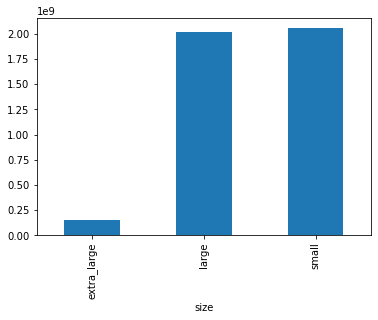

In [23]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Look at the first few rows of data
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")

# Show the plot
plt.show()

## b) Changes in sales over time
Line plots are designed to visualize the relationship between two numeric variables, where each data values is connected to the next one. They are especially useful for visualizing the change in a number over time since each time point is naturally connected to the next time point. In this exercise, you'll visualize the change in avocado sales over three years.

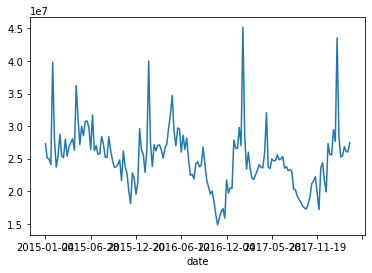

In [24]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby("date")["nb_sold"].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot()

# Show the plot
plt.show()

## c) Avocado supply and demand
Scatter plots are ideal for visualizing relationships between numerical variables. In this exercise, you'll compare the number of avocados sold to average price and see if they're at all related. If they're related, you may be able to use one number to predict the other.

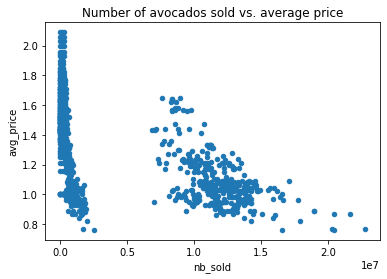

In [25]:
# Scatter plot of nb_sold vs avg_price with title
avocados.plot(x="nb_sold", y="avg_price", kind="scatter", title="Number of avocados sold vs. average price")

# Show the plot
plt.show()

## d) Price of conventional vs. organic avocados
Creating multiple plots for different subsets of data allows you to compare groups. In this exercise, you'll create multiple histograms to compare the prices of conventional and organic avocados.

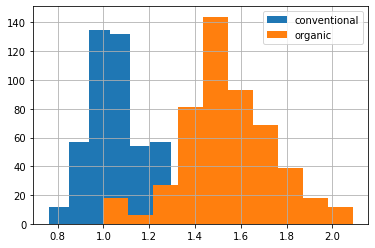

In [26]:
# Histogram of conventional avg_price 
avocados[avocados["type"]=="conventional"]["avg_price"].hist()

# Histogram of organic avg_price
avocados[avocados["type"]=="organic"]["avg_price"].hist()

# Add a legend
plt.legend(["conventional","organic"])

# Show the plot
plt.show()

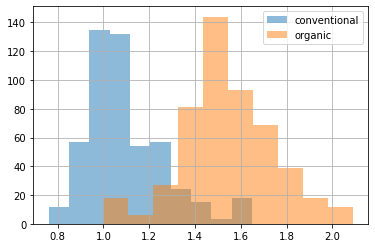

In [27]:
# Modify histogram transparency to 0.5 
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5)

# Modify histogram transparency to 0.5
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

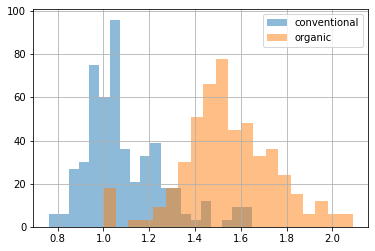

In [28]:
# Modify bins to 20
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins=20)

# Modify bins to 20
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

## e) Finding missing values
Missing values are everywhere, and you don't want them interfering with your work. Some functions ignore missing data by default, but that's not always the behavior you might want. Some functions can't handle missing values at all, so these values need to be taken care of before you can use them. If you don't know where your missing values are, or if they exist, you could make mistakes in your analysis. In this exercise, you'll determine if there are missing values in the dataset, and if so, how many.

In [29]:
#NO AVOCADOS 2016 DATASET!!

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Check individual values for missing values
print(avocados_2016.isna())

# Check each column for missing values
print(avocados_2016.isna().any())

# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind="bar")

# Show plot
plt.show()

NameError: name 'avocados_2016' is not defined

## f) Removing missing values
Now that you know there are some missing values in your DataFrame, you have a few options to deal with them. One way is to remove them from the dataset completely. In this exercise, you'll remove missing values by removing all rows that contain missing values.

In [30]:
#NO AVOCADOS 2016 DATASET!!

# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

NameError: name 'avocados_2016' is not defined

## g) Replacing missing values
Another way of handling missing values is to replace them all with the same value. For numerical variables, one option is to replace values with 0— you'll do this here. However, when you replace missing values, you make assumptions about what a missing value means. In this case, you will assume that a missing number sold means that no sales for that avocado type were made that week.

In this exercise, you'll see how replacing missing values can affect the distribution of a variable using histograms. You can plot histograms for multiple variables at a time as follows:

dogs[["height_cm", "weight_kg"]].hist()

In [31]:
#NO AVOCADOS 2016 DATASET!!

# List the columns with missing values
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]

# Create histograms showing the distributions cols_with_missing
avocados_2016[cols_with_missing].hist()

# Show the plot
plt.show()

NameError: name 'avocados_2016' is not defined

In [32]:
#NO AVOCADOS 2016 DATASET!!

# From previous step
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]
avocados_2016[cols_with_missing].hist()
plt.show()

# Fill in missing values with 0
avocados_filled = avocados_2016.fillna(0)

# Create histograms of the filled columns
avocados_filled[cols_with_missing].hist()

# Show the plot
plt.show()

NameError: name 'avocados_2016' is not defined

## h) List of dictionaries
You recently got some new avocado data from 2019 that you'd like to put in a DataFrame using the list of dictionaries method. Remember that with this method, you go through the data row by row.

date	small_sold	large_sold
"2019-11-03"	10376832	7835071
"2019-11-10"	10717154	8561348

In [34]:
# Create a list of dictionaries with new data
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348


## i) Dictionary of lists
Some more data just came in! This time, you'll use the dictionary of lists method, parsing the data column by column.

date	small_sold	large_sold
"2019-11-17"	10859987	7674135
"2019-12-01"	9291631	6238096

In [35]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17", "2019-12-01"],
  "small_sold": [10859987, 9291631],
  "large_sold": [7674135, 6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096


## j) CSV to DataFrame
You work for an airline, and your manager has asked you to do a competitive analysis and see how often passengers flying on other airlines are involuntarily bumped from their flights. You got a CSV file (airline_bumping.csv) from the Department of Transportation containing data on passengers that were involuntarily denied boarding in 2016 and 2017, but it doesn't have the exact numbers you want. In order to figure this out, you'll need to get the CSV into a pandas DataFrame and do some manipulation!

In [36]:
#NO AIRLINE BUMPING DATASET

# From previous steps
airline_bumping = pd.read_csv("airline_bumping.csv")
print(airline_bumping.head())
airline_totals = airline_bumping.groupby("airline")[["nb_bumped", "total_passengers"]].sum()
airline_totals["bumps_per_10k"] = airline_totals["nb_bumped"] / airline_totals["total_passengers"] * 10000

# Print airline_totals
print(airline_totals)

FileNotFoundError: [Errno 2] No such file or directory: 'airline_bumping.csv'

## i) DataFrame to CSV
You're almost there! To make things easier to read, you'll need to sort the data and export it to CSV so that your colleagues can read it.

In [38]:
#NO AIRLINE BUMPING DATASET

# Create airline_totals_sorted
airline_totals_sorted = airline_totals.sort_values("bumps_per_10k", ascending=False)

# Print airline_totals_sorted
print(airline_totals_sorted)

# Save as airline_totals_sorted.csv
airline_totals_sorted.to_csv("airline_totals_sorted.csv")

NameError: name 'airline_totals' is not defined